In [1]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import plotly.express as px


In [2]:
df = pd.read_csv('../data_analysis/cleaned_data.csv')
df.head()

,id,Locality,Type of property,Subtype of property,Price,Type of sale,Number of rooms,Living Area,Fully equipped kitchen,Terrace,Terrace area,Garden,Garden area,Surface of the land,Surface area of the plot of land,Number of facades,Swimming pool,State of the building,Compound Listing
0,20320744,1150,APARTMENT,APARTMENT,575000,residential_sale,3,160.0,1.0,1.0,40.0,1.0,290.000000,290.000000,1088.610543,2.705321,0.000000,GOOD,single
1,20317718,9000,APARTMENT,APARTMENT,390000,residential_sale,3,96.0,1.0,1.0,29.0,1.0,512.576642,512.576642,1088.610543,2.000000,0.000000,AS_NEW,compound
2,20315842,9051,APARTMENT,APARTMENT,260000,residential_sale,1,76.0,1.0,1.0,12.0,1.0,512.576642,512.576642,1088.610543,2.705321,0.049149,GOOD,compound
3,20315799,9051,APARTMENT,APARTMENT,325000,residential_sale,1,81.0,1.0,1.0,13.0,1.0,512.576642,512.576642,1088.610543,2.705321,0.049149,GOOD,compound
4,20315776,9051,APARTMENT,APARTMENT,365000,residential_sale,3,101.0,1.0,1.0,13.0,1.0,512.576642,512.576642,1088.610543,2.705321,0.049149,GOOD,compound


### Plot the outliers

Plotting outliers typically refers to identifying and visualizing data points in the dataset that deviate significantly from other values. Outliers are extreme values that don't fit the general pattern of the data and can influence the results of statistical analyses. Plotting them helps to identify patterns, understand the data better, and make decisions on how to handle them (such as removing or transforming the outliers).

Common ways to plot outliers 

Box Plot(box-and-whisker plot):  to visually identify outliers based on the interquartile range.

Scatter Plot: Useful for spotting outliers when visualizing relationships between two variables.

Histogram: to detect the presence of outliers by showing the overall distribution of data.

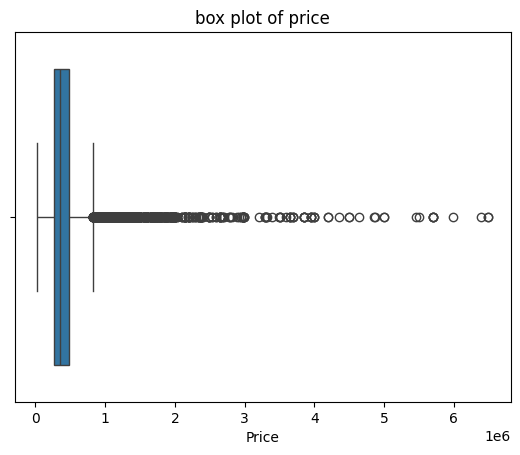

In [3]:
# create a box plot to visualize outliers for price
sn.boxplot(x=df["Price"])
plt.title("box plot of price")
plt.show()

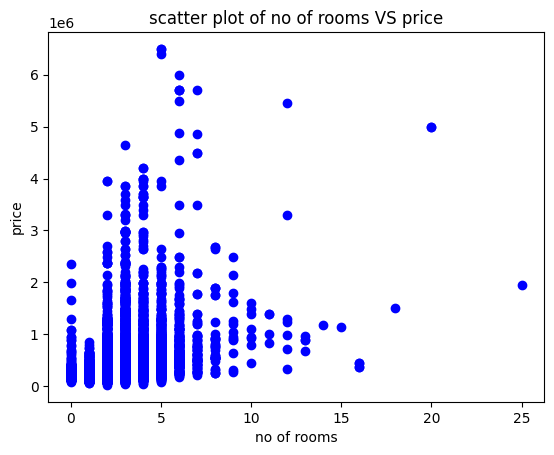

In [4]:
#scatter plot to check relationships between  price and n of rooms
plt.scatter(df["Number of rooms"],df["Price"], color="blue")
plt.title("scatter plot of no of rooms VS price")
plt.xlabel("no of rooms")
plt.ylabel("price")
plt.show()


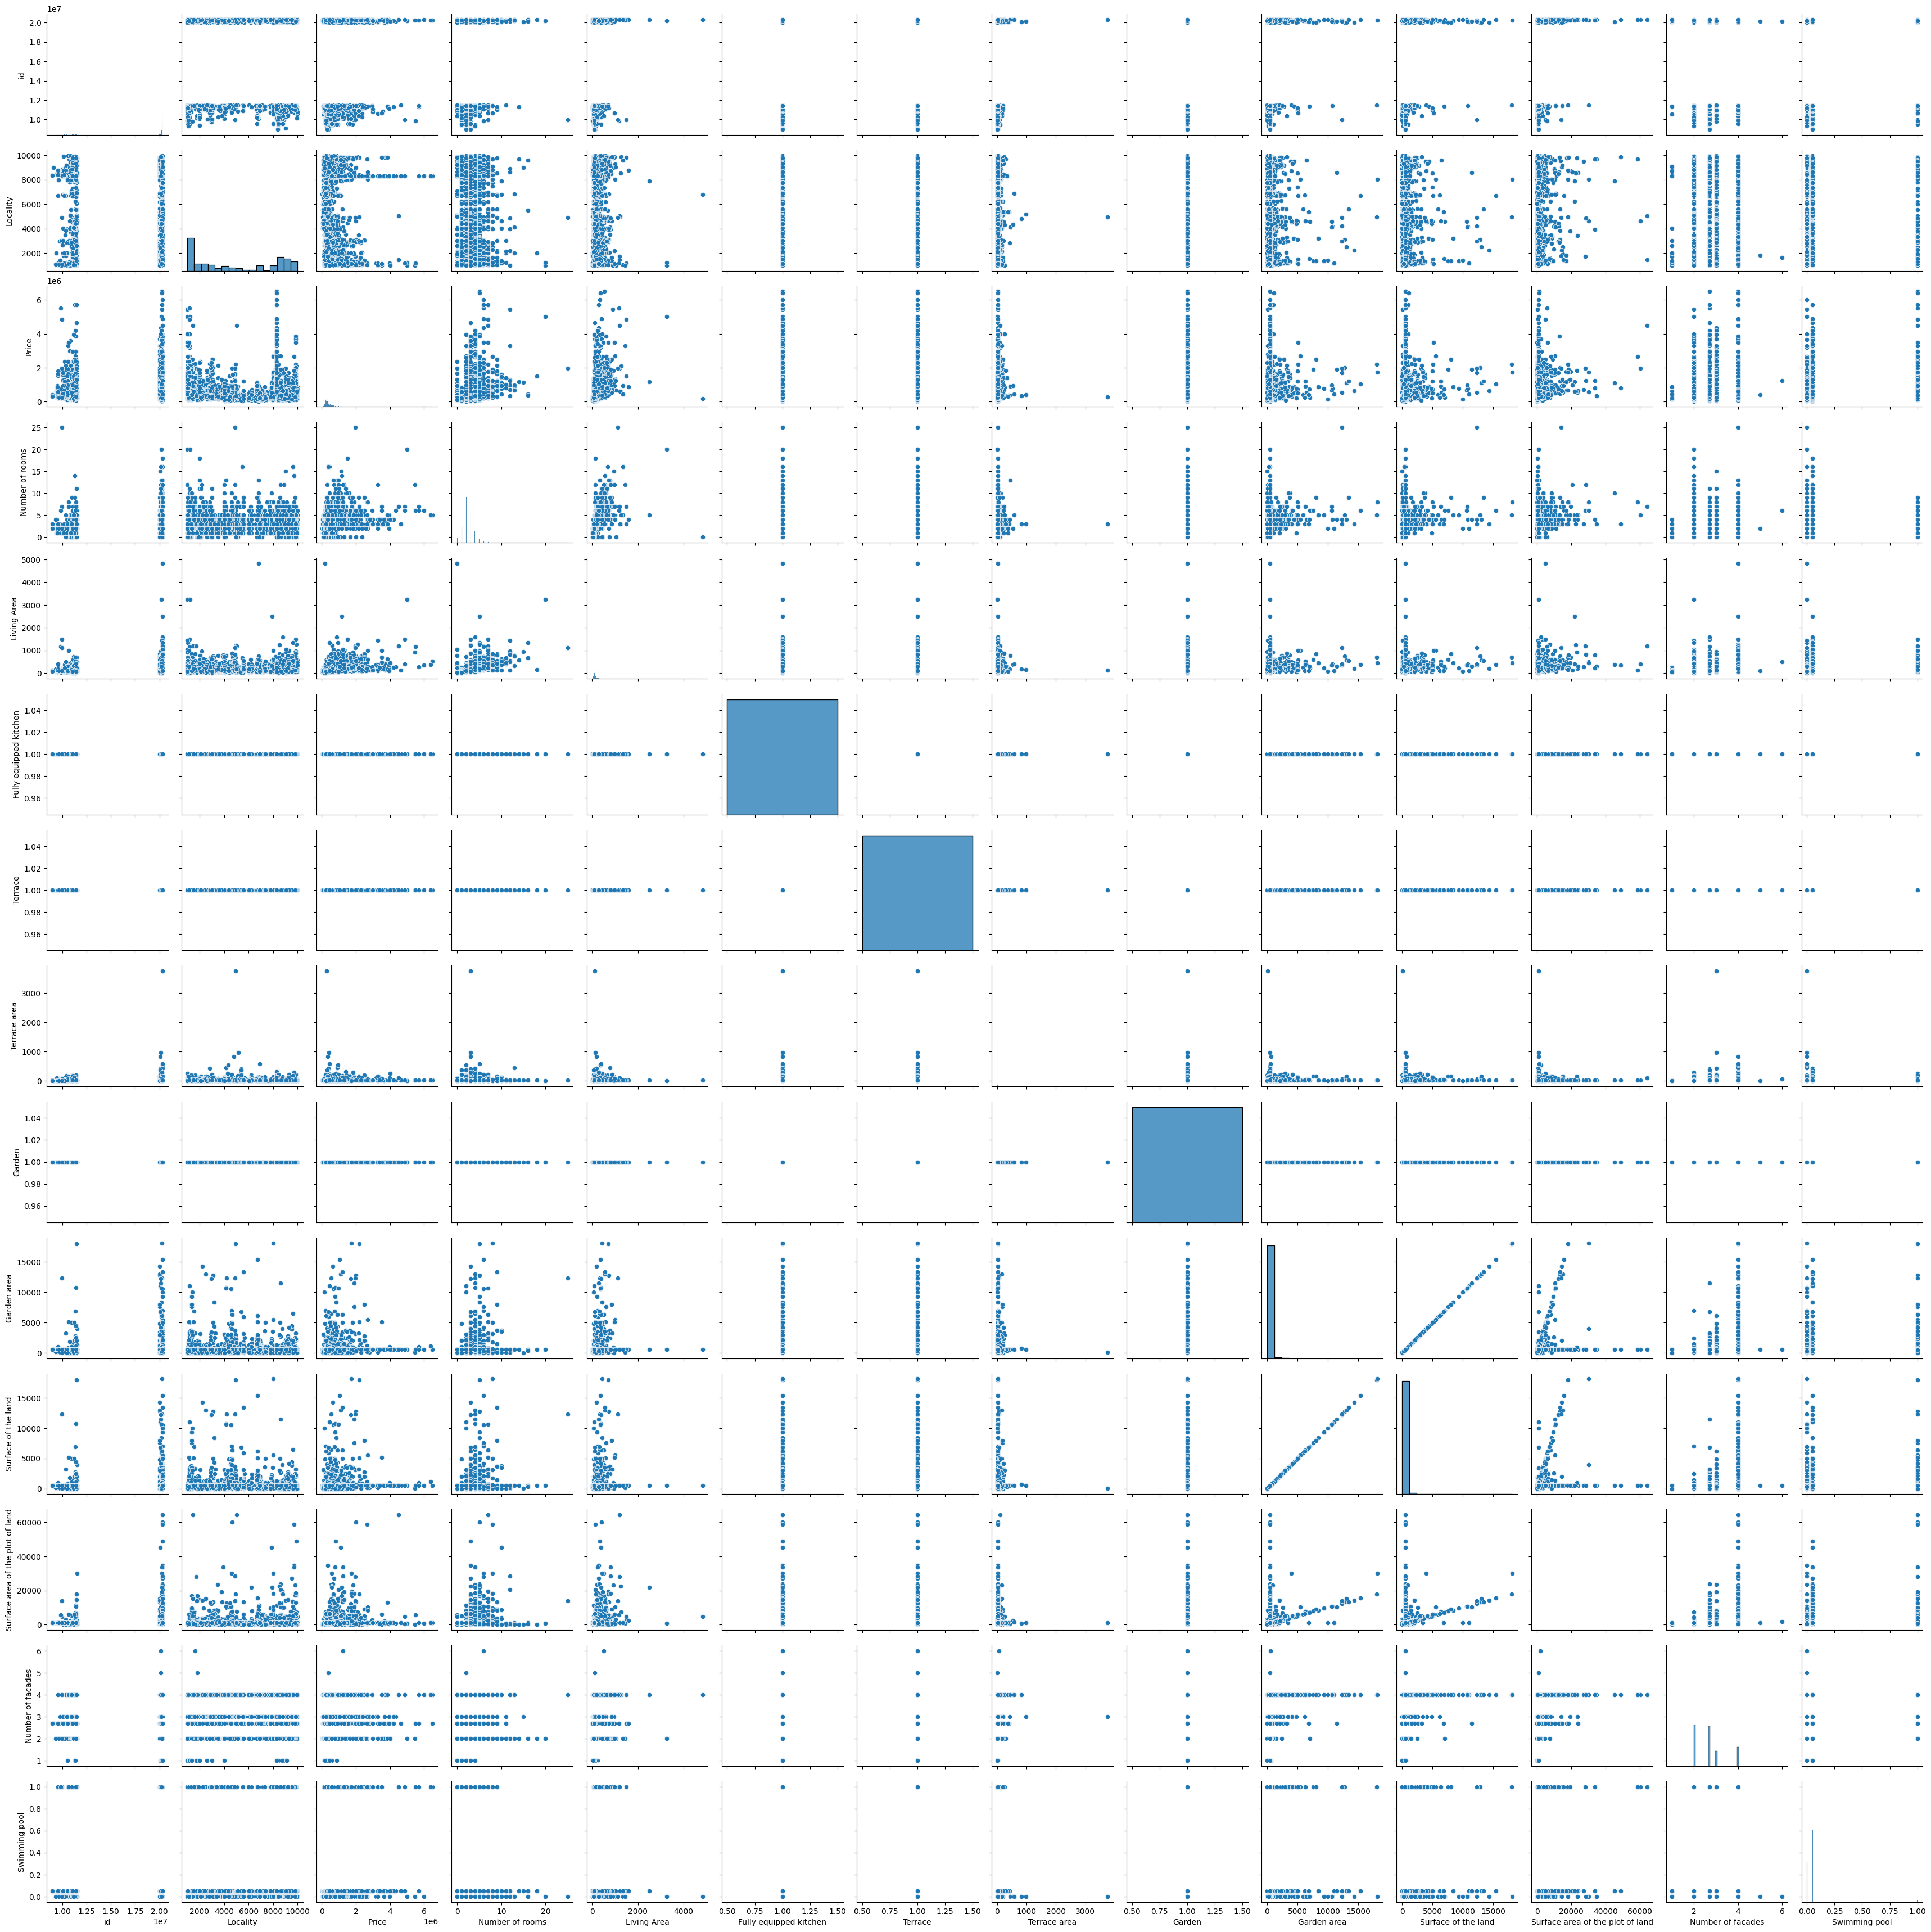

In [5]:
#using pair plot for multiple variables
sn.pairplot(df)
plt.show()

trend:we would expect to see a positive correlation between the number of rooms and the price, i.e., as the number of rooms increases, the price tends to increase as well.

-Outliers: If there are points in the scatter plot that deviate significantly from the overall trend (for example, properties with many rooms but low prices or properties with few rooms but very high prices), those could be outliers.

-Conclusion for Outliers in Scatter Plot: Outliers here could indicate unusual cases where properties with many rooms are priced lower than expected, or properties with fewer rooms are priced higher than expected. These could be worth investigating to understand the causes — for instance, properties with high prices could be located in more desirable areas (like city centers), or smaller properties might be priced higher due to unique features or renovations.

By visualizing these outliers with plots, you gain a better understanding of the data distribution and can make more informed decisions about your analysis and modeling.


#### Which variables would you delete and why ?

The decision to delete variables depends on several factors such as empty values, redundancy, and correlation with other variables
Whether or not a property is furnished can impact its price
even fireplace can add value to a property, particularly in colder climates or upscale properties.
-But i deleted both are missing values(empty)-'Furnished','Fireplace'



### Represent the number of properties according to their surface using a histogram.


In [6]:
print(df.columns)

Index(['id', 'Locality', 'Type of property', 'Subtype of property', 'Price',
       'Type of sale', 'Number of rooms', 'Living Area',
       'Fully equipped kitchen', 'Terrace', 'Terrace area', 'Garden',
       'Garden area', 'Surface of the land',
       'Surface area of the plot of land', 'Number of facades',
       'Swimming pool', 'State of the building', 'Compound Listing'],
      dtype='object')


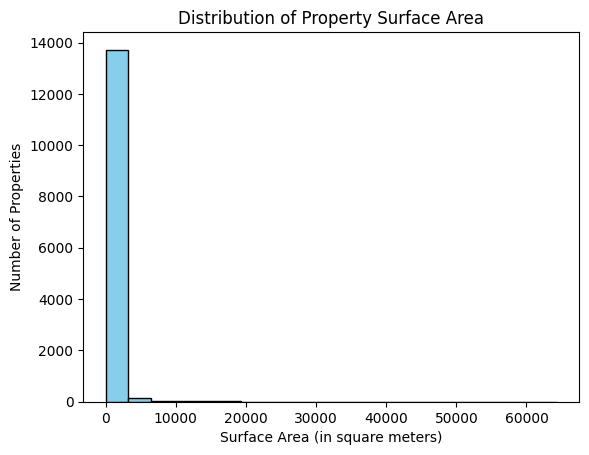

In [7]:
# Create a histogram for the surface area 
#bins-number of intervals
plt.hist(df['Surface area of the plot of land'], bins=20, color='skyblue', edgecolor='black')

# Set the title and labels
plt.title("Distribution of Property Surface Area")
plt.xlabel("Surface Area (in square meters)")
plt.ylabel("Number of Properties")

# Show the plot
plt.show()

the Histogram Represents:
The histogram shows the distribution of surface areas for the properties in the dataset.
The x-axis represents the surface area (in square meters), and the y-axis represents the number of properties that have a surface area within each interval.

Higher bars on the histogram indicate that more properties have surface areas within that particular range, while lower bars suggest fewer properties in that range.
By adjusting the number of bins (bins=20), you can get a more granular or broader view of the surface area distribution.

Why This Is Useful:
-to understand the spread and concentration of property sizes in the dataset.

-to easily identify if there is a normal distribution, skewness, or other patterns (e.g., most properties being small or large in size).

-for making pricing or market predictions, as larger properties often have higher prices, and the surface area can influence the property's market value.

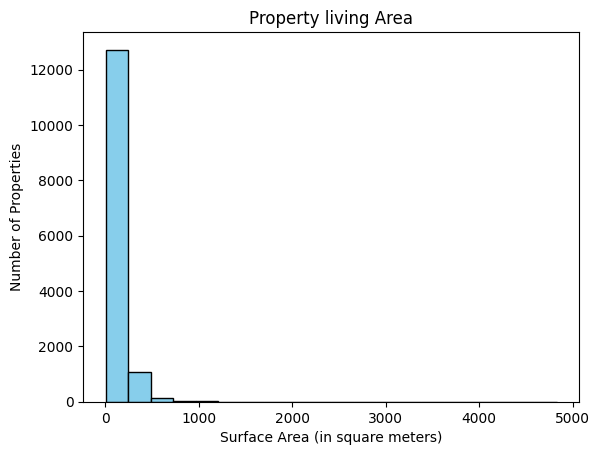

In [8]:
# Create a histogram for the surface area 
plt.hist(df['Living Area'], bins=20, color='skyblue', edgecolor='black')

# Set the title and labels
plt.title("Property living Area")
plt.xlabel("Surface Area (in square meters)")
plt.ylabel("Number of Properties")

# Show the plot
plt.show()

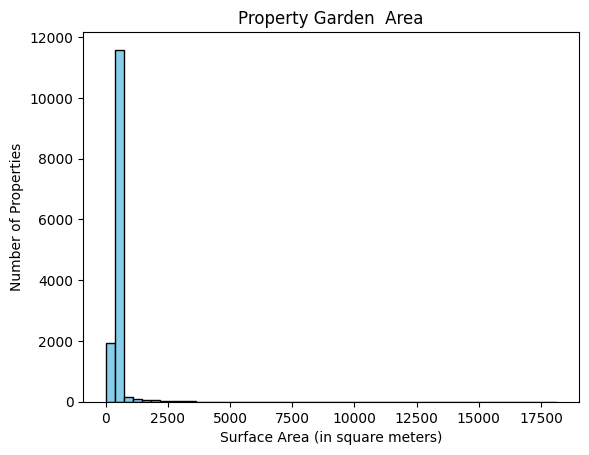

In [9]:
# Create a histogram for the surface area 
#showing how many properties have a specific garden surface area (measured in square meters)tttttg   gt
plt.hist(df['Garden area'], bins=50, color='skyblue', edgecolor='black')

# Set the title and labels
plt.title("Property Garden  Area")
plt.xlabel("Surface Area (in square meters)")
plt.ylabel("Number of Properties")

# Show the plot
plt.show()

### which  variables are the most important and why?


Price (Target variable)is the most critical variable in real estate analysis, especially for price prediction models. It is the target variable for most machine learning models and regression analyses in this domain.

Living Area is a key factor in determining the price of a property and is directly correlated with price per square meter,Larger homes generally have higher prices, as they provide more usable space for living, dining, and recreational activities.


Number of rooms  is a common metric that people use to evaluate the size and value of a home, particularly for families looking for more space.


Swimming Pool - it is moderate ,Often a luxury feature, not essential for valuation.

Least Important:

Number of Facades - Minor impact compared to other features like living area or plot size.

Terrace Area - Adds appeal but generally does not have as much impact as the overall size or location of the property.

What are the most expensive municipalities in Belgium,Wallonia and Flanders?(Average price, median price, price per square meter)

-the areas where real estate prices (for homes or properties) are the highest on average.

What are the less expensive municipalities in Belgium,Wallonia and Flanders?(Average price, median price, price per square meter)

-areas where real estate prices are the lowest

Average price-mean price of properties

median price-middle price

price per square meter-how much one pays for each square meter of property-based on size of the property



In [14]:
# Convert the DataFrame to a GeoDataFrame
# But CSV must has columns for latitude and longitude, or x and y coordinates
# Load the CSV into a DataFrame
df = pd.read_csv('../visualizations/dataset.csv')

# Define categories ( based on the actual data)
categories = [
    'Most_Expensive_in_Belgium', 'Least_xpensive_in_Belgium',
    'Most_expensive_in_walloons', 'Least_expensive_in_Walloons',
    'Most_expensive_in_flanders', 'Least_expensive_in_Flanders'

]

# Add the 'category' column to the DataFrame (ensure the list length matches the data)
df['category'] = pd.Series(categories * (len(df) // len(categories)) + categories[:len(df) % len(categories)])

# Remove the 'Unnamed: 0' column if it exists (often an index column)
df = df.drop(columns=['Unnamed: 0'], errors='ignore')

# Clean and convert price columns
# Extract numeric values from 'average_price', 'median_price', and 'price_m2'
df[['locality', 'average_price']] = df['average_price'].str.extract(r"\((.*),\s*([\d\.]+)\)")
df['average_price'] = pd.to_numeric(df['average_price'], errors='coerce')

df[['locality', 'median_price']] = df['median_price'].str.extract(r"\((.*),\s*([\d\.]+)\)")
df['median_price'] = pd.to_numeric(df['median_price'], errors='coerce')

df[['Province', 'price_m2']] = df['price_m2'].str.extract(r"\((.*),\s*([\d\.]+)\)")
df['price_m2'] = pd.to_numeric(df['price_m2'], errors='coerce')

# Filter the DataFrame to include only relevant columns
df = df[['category', 'locality', 'average_price', 'median_price', 'price_m2', 'Province']]

# Display the cleaned DataFrame and its columns
print(df.head())

                      category                 locality  average_price  \
0    Most_Expensive_in_Belgium  'S-gravenwezel-schilde'      1675000.0   
1    Least_xpensive_in_Belgium       'Bouillon-ucimont'        59900.0   
2   Most_expensive_in_walloons  'S-gravenwezel-schilde'      1675000.0   
3  Least_expensive_in_Walloons       'Schuiferskapelle'       135000.0   
4   Most_expensive_in_flanders            'Lasne-ohain'      1480000.0   

   median_price  price_m2                       Province  
0     1675000.0  21112.39            'Province of Namur'  
1       59900.0   1110.07          'Province of Hainaut'  
2     1675000.0  16048.67    'Province of West Flanders'  
3      135000.0   3720.47  'Province of Flemish Brabant'  
4     1490000.0  21112.39            'Province of Namur'  


C:\Users\elsab\AppData\Local\Temp\ipykernel_27576\1416436773.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(data=df, x='Province', y='price_m2', palette='coolwarm')


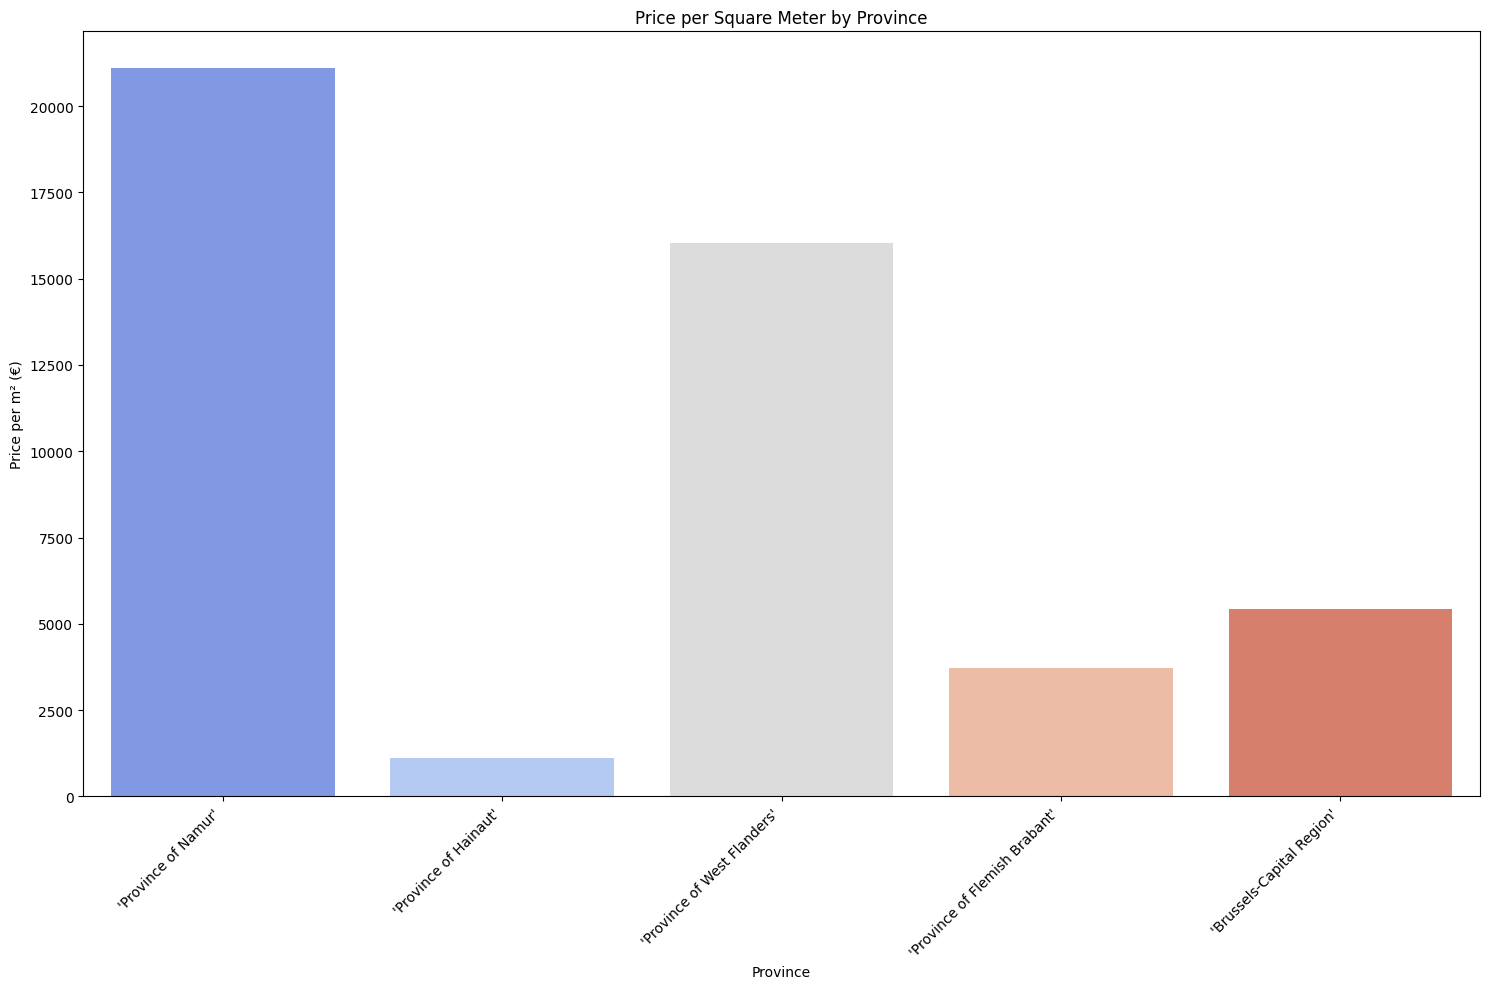

In [11]:
# # Bar chart for prices per square meter by province
plt.figure(figsize=(15, 10))
sn.barplot(data=df, x='Province', y='price_m2', palette='coolwarm')
plt.title('Price per Square Meter by Province')
plt.ylabel('Price per m² (€)')
plt.xlabel('Province')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [12]:
# Create a dictionary with localities and their coordinates
coordinates = {
    'S-gravenwezel-schilde': (51.2629, 4.5610),
    'Bouillon-ucimont': (49.7946, 5.0706),
    'Schuiferskapelle': (51.0329, 3.3338),
    'Lasne-ohain': (50.6991, 4.4692),
    'Ixelles-chatelain': (50.8255, 4.3598),
    'Molenbeek': (50.8589, 4.3121)
}

# Extract latitude and longitude coordinates
df['latitude'] = df['locality'].str.strip("'").map(lambda loc: coordinates.get(loc, (None, None))[0])
df['longitude'] = df['locality'].str.strip("'").map(lambda loc: coordinates.get(loc, (None, None))[1])
print(df.head(10))

                      category                 locality  average_price  \
0    Most_Expensive_in_Belgium  'S-gravenwezel-schilde'      1675000.0   
1    Least_xpensive_in_Belgium       'Bouillon-ucimont'        59900.0   
2   Most_expensive_in_walloons  'S-gravenwezel-schilde'      1675000.0   
3  Least_expensive_in_Walloons       'Schuiferskapelle'       135000.0   
4   Most_expensive_in_flanders            'Lasne-ohain'      1480000.0   
5  Least_expensive_in_Flanders       'Bouillon-ucimont'        59900.0   
6    Most_Expensive_in_Belgium      'Ixelles-chatelain'      1350000.0   
7    Least_xpensive_in_Belgium              'Molenbeek'       192000.0   

   median_price  price_m2                       Province  latitude  longitude  
0     1675000.0  21112.39            'Province of Namur'   51.2629     4.5610  
1       59900.0   1110.07          'Province of Hainaut'   49.7946     5.0706  
2     1675000.0  16048.67    'Province of West Flanders'   51.2629     4.5610  
3      135000

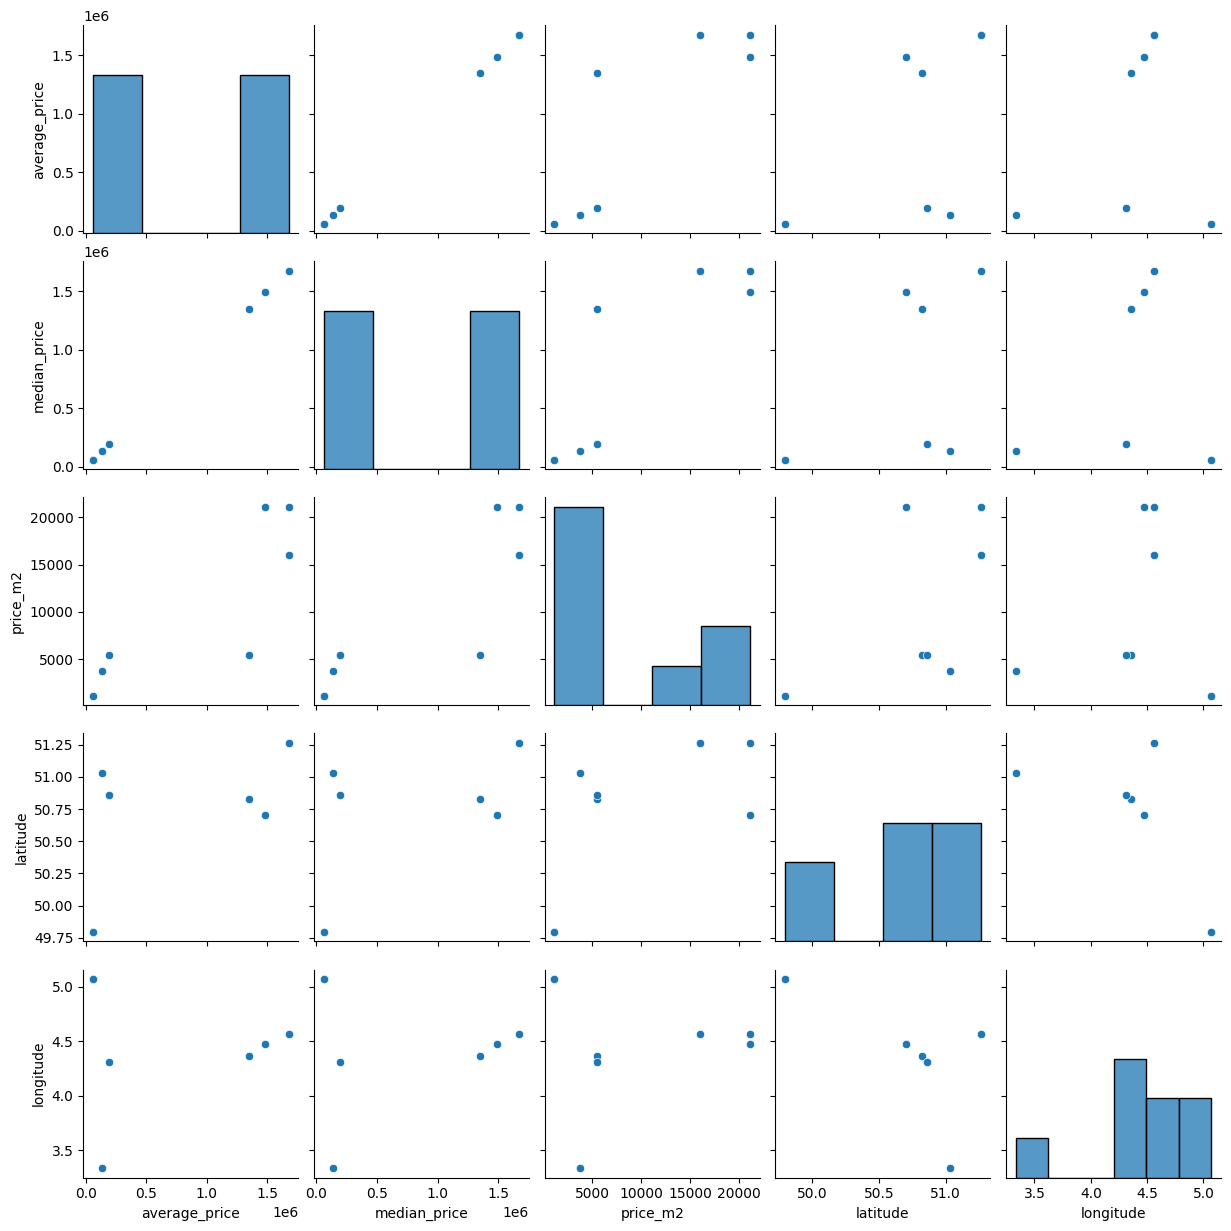

In [13]:
#using pair plot for multiple variables
sn.pairplot(df)
plt.show()